DATASET 2: DATA SCIENCE JOBS

 work_year                            job_title job_category salary_currency  salary  salary_in_usd employee_residence experience_level employment_type work_setting company_location company_size
      2022 Machine Learning Engineer  in office     Analysis             EUR  186597         136086                 US               MI              CT       Remote               DE            L
      2020               Statistician  (Remote)        ML/AI             JPY  110630          67982                 JP               EX              FL       Remote               IN            M
      2022          Machine Learning Engineer          ML/AI             INR   61280         153309                 UK               MI              CT       Hybrid               CN            L
      2022              Data Analyst  in office        ML/AI             JPY  154130         135242                 DE               SE              FT       Hybrid               MX            L
      2020               

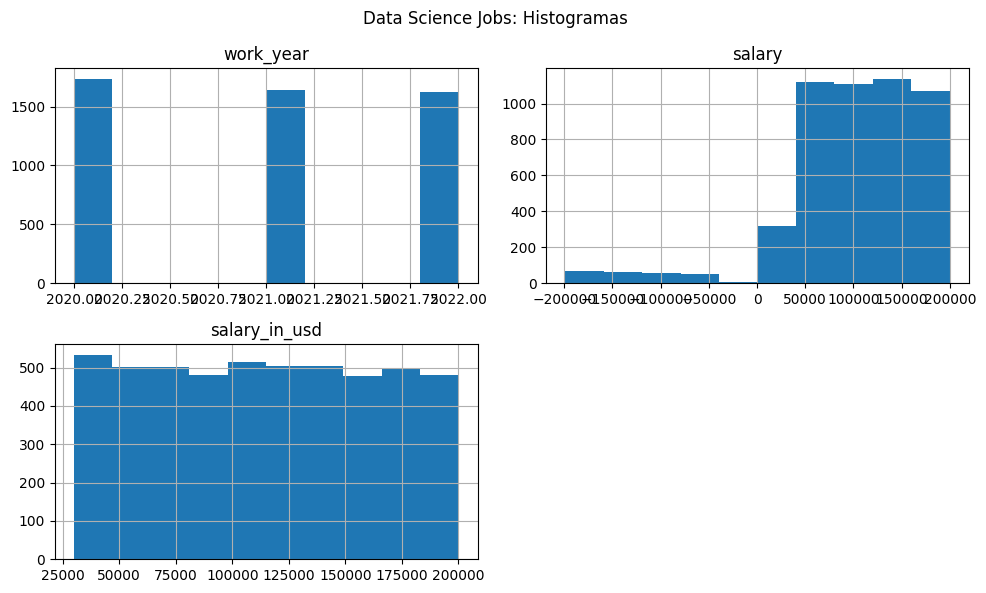

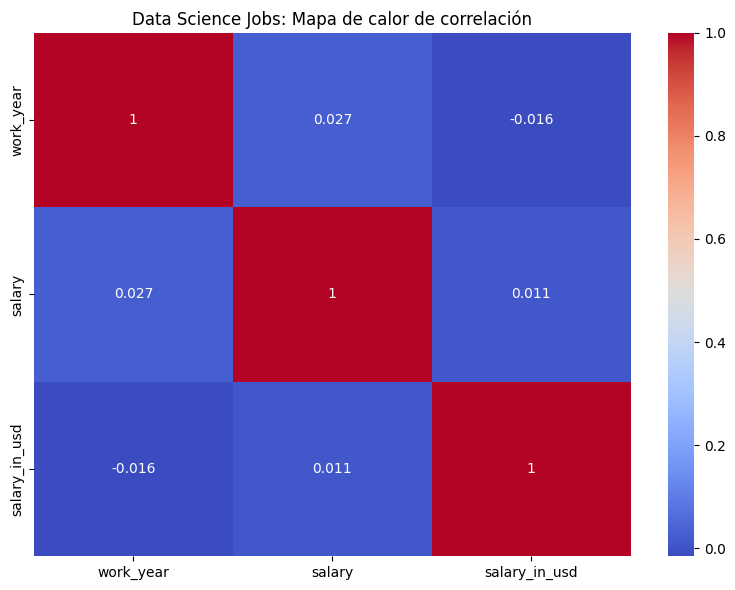


Valores faltantes:
             index   0
         work_year   0
         job_title   0
      job_category 500
   salary_currency 500
            salary   0
     salary_in_usd   0
employee_residence   0
  experience_level 500
   employment_type   0
      work_setting   0
  company_location   0
      company_size 500

Valores atípicos:

work_year: 0 valores atípicos

salary: 201 valores atípicos

salary_in_usd: 0 valores atípicos

--- Resumen de hallazgos ---

            * El conjunto de datos contiene información sobre trabajos de ciencia de datos,
              incluyendo el año, el título del trabajo, la categoría del trabajo, la moneda del salario,
              el salario, el salario en USD, la residencia del empleado, el nivel de experiencia,
              el tipo de empleo, el entorno de trabajo, la ubicación de la empresa y el tamaño de la empresa.
            * Hay un total de 5,000 filas y 12 columnas en el conjunto de datos.
            * Hay valores nulos en las columnas '

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Cargar el conjunto de datos
df_jobs = pd.read_csv("C:/Users/ivan_/Documents/bootcamp/machine_learning/core05/data_science_job.csv")

# Mostrar las primeras 5 filas y todas las columnas
print(df_jobs.head().to_string(index=False))

# Mostrar columnas y sus tipos
print(df_jobs.info())

# Realizar EDA e imprimir los hallazgos
def eda(df, name):
    print(f"\n--- {name.upper()} ---")

    # Mostrar las estadísticas descriptivas de las características numéricas
    print("\nEstadísticas descriptivas:")
    print(df.describe().to_string())

    # Analizar la distribución de las características categóricas
    print("\nCaracterísticas categóricas:")
    for col in df.select_dtypes(include=['object']):
        if df[col].nunique() < 50:  # Solo imprimir si hay un número razonable de valores únicos
            print(f"\n{col}:")
            print(df[col].value_counts().reset_index().to_string(index=False))

    # Crear visualizaciones para comprender la distribución de las variables
    df.hist(figsize=(10, 6))
    plt.suptitle(f'{name}: Histogramas')
    plt.tight_layout()
    plt.show()

    # Visualizar las correlaciones entre variables
    plt.figure(figsize=(8, 6))

    # Seleccionar solo las columnas numéricas para calcular la correlación
    numeric_df = df.select_dtypes(include=np.number)
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

    plt.title(f'{name}: Mapa de calor de correlación')
    plt.tight_layout()
    plt.show()

    # Detectar valores faltantes
    print("\nValores faltantes:")
    print(df.isnull().sum().reset_index().to_string(index=False))

    # Detectar valores atípicos (usando el método IQR como ejemplo)
    print("\nValores atípicos:")
    for col in df.select_dtypes(include=np.number):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n{col}: {len(outliers)} valores atípicos")

    # --- Resumen de hallazgos del EDA ---
    print("\n--- Resumen de hallazgos ---")
    if name == "Data Science Jobs":
        print(
            """
            * El conjunto de datos contiene información sobre trabajos de ciencia de datos,
              incluyendo el año, el título del trabajo, la categoría del trabajo, la moneda del salario,
              el salario, el salario en USD, la residencia del empleado, el nivel de experiencia,
              el tipo de empleo, el entorno de trabajo, la ubicación de la empresa y el tamaño de la empresa.
            * Hay un total de 5,000 filas y 12 columnas en el conjunto de datos.
            * Hay valores nulos en las columnas 'job_category', 'salary_currency',
              'experience_level' y 'company_size'.
            * Se identificaron algunos outliers en la columna 'salary'.
            * Las visualizaciones (histogramas y mapa de calor de correlación) ayudan a
              comprender la distribución de las variables y las relaciones entre ellas.
            """
        )

# Realizar EDA para el conjunto de datos
eda(df_jobs, "Data Science Jobs")